In [1]:
using Convex
using SCS # I think I fixed it
using ECOS
using Plots
using LinearAlgebra

In [2]:
gr()
include("plotregion.jl")

Main.PlotRegion

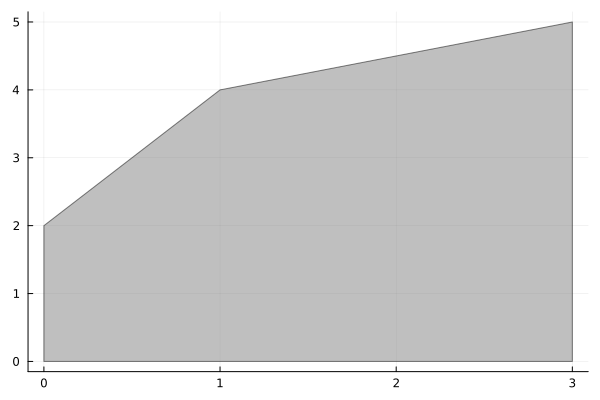

In [3]:
A1 = [-2.0 1; 
      -1 2; 
       1 0]
b = [2.0; 7; 3]

A = [A1 Matrix{Float64}(I,3,3)] # form the problem with slacks.

PlotRegion.plotregion(A,b)

In [4]:
# Convert the problem into standard form.
cs = [-1 -2 0 0 0]'
AS = A

3×5 Matrix{Float64}:
 -2.0  1.0  1.0  0.0  0.0
 -1.0  2.0  0.0  1.0  0.0
  1.0  0.0  0.0  0.0  1.0

In [5]:
""" Solve the central-path problem for interior point methods. """
function ip_central(c,A,b,tau)
    x = Variable(length(c))
    p = minimize(c'*x - tau*sum(log(x)))
    p.constraints += A*x == b
    #p.constraints += x .>= 0
    #solve!(p, SCSSolver(verbose=false, eps=1e-6, rho_x=1e-5))
    solve!(p, ECOS.Optimizer; silent_solver = true)
    return x.value, p
end
ip_central(cs,AS,b,10.0)[1]

5×1 Matrix{Float64}:
 2.194306745844007
 2.19689605264216
 4.191717426412428
 4.8005145961358595
 0.8056932352928711

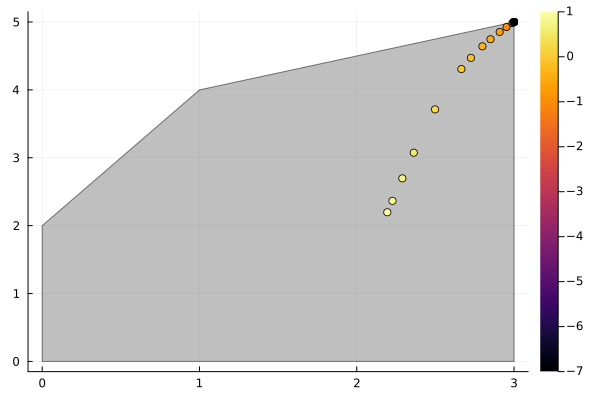

In [6]:
taus = vec([10 7.5 5 3.5 2 1 0.75 0.5 0.35 0.20 10.0.^(range(-1,stop=-7,length=10))'])

p = PlotRegion.plotregion(AS,b)
for tau in taus
    x = ip_central(cs, AS, b, tau)[1]
    scatter!([x[1]],[x[2]],label="", marker_z=log10(tau))
end
p

## Show a centered vs. uncentered step


lam = [-0.3307108237802758, -0.950742118170545, -2.987362156018697]


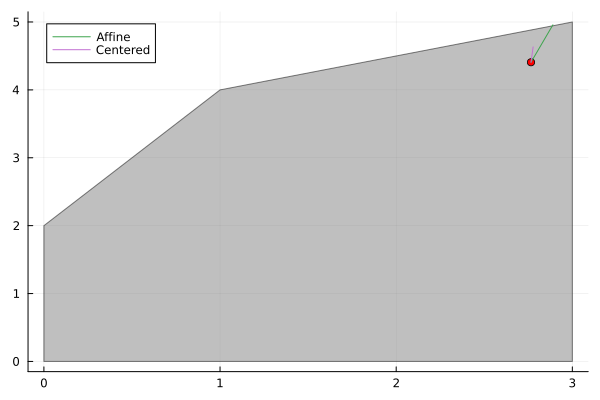

In [6]:
# Convert the problem into standard form.
cs = [-1 -2 0 0 0]'
AS = A

tau = 1
x0,prob = ip_central(cs,AS,b,tau)
x = copy(x0)
x[1] += 0.1
x[2] += 0.1

lam = vec(prob.constraints[1].dual)
@show lam

# show the region and the starting point
plt = PlotRegion.plotregion(AS,b)
scatter!([x[1]],[x[2]],label="", color="red")

# compute the steps 
n = length(cs)
m = size(AS,1)

s = tau./x
J = [zeros(n,n) AS'         Matrix{Float64}(I,n,n); 
     AS        zeros(m,m)   zeros(m,n);
    Diagonal(vec(s))  zeros(n,m) Diagonal(vec(x))]

mu = dot(x,s)/n
sigma = 0.5

F = [s + AS'*lam - cs; AS*x - b; x.*s]

Fc = [s + AS'*lam .- cs; AS*x .- b; x.*s .- sigma*mu ]

p = J\-F
pc = J\-Fc

plot!([x[1];x[1] + p[1]], [x[2];x[2] + p[2]], label="Affine")
plot!([x[1];x[1] + pc[1]], [x[2];x[2] + pc[2]], label = "Centered")

plt

In [8]:
xf = [x; lam; s];
[xf+p xf+pc]

13×2 Matrix{Float64}:
  2.88967     2.77743
  4.9581      4.63238
  2.82124     2.92249
 -0.0265345   0.512672
  0.110328    0.222565
 -0.0221527  -0.176435
 -0.974727   -0.962704
 -2.00276    -2.4948
 -0.0162706   0.179222
 -0.0283935   0.101843
  0.0221527   0.176435
  0.974727    0.962704
  2.00276     2.4948

In [15]:
# Convert the problem into standard form.
cs = [-1 -2 0 0 0]'
AS = A

tau = 0.25
x0,prob = ip_central(cs,AS,b,tau)
x = copy(x0)
x = [0.01,0.01,0.01,0.01,0.01,-1.0,-1.0,-1.0,0.01,0.01,0.01,0.01,0.01]


lam = vec(prob.constraints[1].dual)
@show lam

# show the region and the starting point
plt = PlotRegion.plotregion(AS,b)
scatter!([x[1]],[x[2]],label="", color="red")

# compute the steps 
n = length(cs)
m = size(AS,1)

s = tau./x
J = [zeros(n,n) AS'         Matrix{Float64}(I,n,n); 
     AS        zeros(m,m)   zeros(m,n);
    Diagonal(vec(s))  zeros(n,m) Diagonal(vec(x))]

mu = dot(x,s)/n
sigma = 0.5

F = [s + AS'*lam - cs; AS*x - b; x.*s]

Fc = [s + AS'*lam .- cs; AS*x .- b; x.*s .- sigma*mu ]

p = J\-F
pc = J\-Fc

plot!([x[1];x[1] + p[1]], [x[2];x[2] + p[2]], label="Affine")
plot!([x[1];x[1] + pc[1]], [x[2];x[2] + pc[2]], label = "Centered")

plt

lam = [-0.08447088127147132, -0.9837137367720619, -2.2392099969346972]


LoadError: ArgumentError: mismatched height in block row 3 (expected 13, got 5)

In [ ]:
for tau in taus
    x = ip_central(cs, AS, b, tau)[1]
    scatter!([x[1]],[x[2]],label="", marker_z=log10(tau))
end
plt

In [ ]:
# Convert the problem into standard form.
cs = [-1 -2 0 0 0]'
AS = A

tau = 1
x0,prob = ip_central(cs,AS,b,tau)
x = copy(x0)
x[1] += 0.0
x[2] += 0.0

lam = vec(prob.constraints[1].dual)
@show lam

scatter!([x[1]],[x[2]],label="", color="red")

# compute the steps 
n = length(cs)
m = size(AS,1)

s = tau./x
J = [zeros(n,n) AS'         Matrix{Float64}(I,n,n); 
     AS        zeros(m,m)   zeros(m,n);
    Diagonal(vec(s))  zeros(n,m) Diagonal(vec(x))]

mu = dot(x,s)/n
sigma = 0.5

F = [s + AS'*lam - cs; AS*x - b; x.*s]

Fc = [s + AS'*lam .- cs; AS*x .- b; x.*s .- sigma*mu ]

p = J\-F
pc = J\-Fc

plot!([x[1];x[1] + p[1]], [x[2];x[2] + p[2]], label="Affine")
plot!([x[1];x[1] + pc[1]], [x[2];x[2] + pc[2]], label = "Centered")

plt

In [ ]:
# Convert the problem into standard form.
cs = [-1 -2 0 0 0]'
AS = A

tau = 1
x0,prob = ip_central(cs,AS,b,tau)
x = copy(x0)
x[1] += 0.5
x[2] += 0.5

lam = vec(prob.constraints[1].dual)
@show lam

scatter!([x[1]],[x[2]],label="", color="red")

# compute the steps 
n = length(cs)
m = size(AS,1)

s = tau./x
J = [zeros(n,n) AS'         Matrix{Float64}(I,n,n); 
     AS        zeros(m,m)   zeros(m,n);
    Diagonal(vec(s))  zeros(n,m) Diagonal(vec(x))]

mu = dot(x,s)/n
sigma = 0.5

F = [s + AS'*lam - cs; AS*x - b; x.*s]

Fc = [s + AS'*lam .- cs; AS*x .- b; x.*s .- sigma*mu ]

p = J\-F
pc = J\-Fc

plot!([x[1];x[1] + p[1]], [x[2];x[2] + p[2]], label="Affine")
plot!([x[1];x[1] + pc[1]], [x[2];x[2] + pc[2]], label = "Centered")

plt